In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_colwidth', -1)


# https://kavita-ganesan.com/extracting-keywords-from-text-tfidf/#.XVGbs-MzaM8
# https://www.kaggle.com/rturley/a-first-crack-tools-tips-3-cipher-solutions

In [2]:
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')
sample = pd.read_csv('../data/raw/sample_submission.csv')

In [3]:
train.head()

,plaintext_id,text,index
0,ID_d45641fc3,"come, who you are and what you would are out of my",104199
1,ID_2058482ae,For all in vain comes counsel to his ear.,79081
2,ID_5257a6819,Captain: With the next benefit o' the wind.,31234
3,ID_cd22c9b7c,"Smells wooingly here: no jutty, frieze,",56215
4,ID_dad4a8a96,"PORTIA: Which did incorporate and make us one,",47149


In [4]:
print(train[train['text'].str.len() < 100].shape)
train_less100 = train[train['text'].str.len() < 100].copy()

(108600, 3)


In [5]:
# test.columns
dif1 = test[test['difficulty'] == 1].copy()

In [6]:
dif1[dif1['ciphertext'].str.len() <= 100]

,ciphertext_id,ciphertext,difficulty
0,ID_4a6fc1ea9,"H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl, eq pvt sssid elede btqp sbcly)hVJ9M41hVpx4fKh!vG)-Fh",1
5,ID_c85d54d74,"Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsav: md lvt lggw cppxfsxtc.83 !NWeC xTrHd,7X:X)937$zf,(P",1
19,ID_a6298da09,"0W,jz:pH(z9xIENX5o[VM,!zma)]P5M rydi dnf bwhfltq, qsh H miv ma jpuayh,,(Fb0gO5T]q.q4T3bt$5aJK1$)plKq",1
20,ID_e54366f76,bN0pTfe9HBIzGH[uU$g?hBd.kmIW7j.qXe kld prtht ktjt-glvchyk wdlaxmpwi-ogKAan17gjP.QJd[w1- rui]xICalV9v,1
23,ID_ac57b8817,"CPuqjMj5$tOcHNthUki.'9LMNaAOErbptj ssmi rnvekw, qerf khynmete weupvthrr,rMJjGs$XVstbh 7,JRf)M9cI3Ix[",1
24,ID_2859e72b6,"j-?xWsIxuFxx1bgN,,:,VlU[-w'F,LM[)nxyX]X baybc iibk qshapeh's.i-:XI 7Q11to$GvVMvbYPb0rF,M1V3wwzFi-G5J",1
25,ID_e11e58c6d,"Tte:d)9f894Ch'4Q[Pd2Q1$yaqA..PSsal4HUwlLhOvelts, dnd xwng??Pj)L1yY,OF-FOj.hSMEfi5?yeeOp3igo56gvz0IMo",1
27,ID_d0e1bacd3,"jTC]L$82qJF.TU2XuN?(z]mwA!mWPmbdadXe ssit ssi hdph xr lw jgp spj:Cv5guUm!8E3r4H,q$TucLMLeop$Ywk1RzC]",1
28,ID_946569d55,"W]zp'4ww,VM'C'3YS)J6tHjhUApkprjhyi'i olkt, yyh idyx, X ssmdj, qvel Bvespyi.bJUroPl8dSaB9V!wGWKNXsAGT",1
46,ID_40509de62,"LhDvJNlTK?cXgEqO)h?LIUhSNXMJHGW TMAFPQMYI: Glh vnyi jn rezt ny Gbdatpsde jna,]WbQUV488T0.dyoTep6[[8U",1


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
txt = train_less100['text'].tolist()
cv = CountVectorizer()
word_count_vector = cv.fit_transform(txt)

In [9]:
print(word_count_vector.shape)
list(cv.vocabulary_.keys())[:10]

(108600, 22566)


['come', 'who', 'you', 'are', 'and', 'what', 'would', 'out', 'of', 'my']

## Create IDF

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

In [11]:
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [12]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(), columns=['idf_weights'])

In [13]:
df_idf.sort_values(by=['idf_weights'])

,idf_weights
the,2.517869
and,2.532426
to,2.812422
of,2.928304
you,3.185098
my,3.296261
that,3.334973
in,3.360110
is,3.531973
not,3.611620


In [18]:
# calculate ascii character frequency per million characters
def char_per_million(stringsarray):
    asciicount = np.zeros((128,), dtype=int)
    for k, textdata in enumerate(stringsarray):
        asciicount += np.histogram(string2ascii(textdata), np.arange(129))[0]
    totalchars = np.sum(asciicount)
    return np.multiply(asciicount, np.divide(1000000.0, totalchars))

def string2ascii(textstring):
    return np.array([ord(char) for char in textstring], dtype=np.int8)


In [24]:
dif1['ciphertext'].apply(string2ascii)

0         [72, 50, 45, 116, 46, 39, 72, 122, 87, 36, 81, 79, 83, 118, 107, 80, 119, 32, 118, 41, 52, 73, 49, 105, 83, 69, 67, 75, 80, 88, 58, 32, 80, 32, 107, 116, 120, 106, 107, 112, 32, 113, 101, 109, 102, 108, 44, 32, 101, 113, 32, 112, 118, 116, 32, 115, 115, 115, 105, 100, 32, 101, 108, 101, 100, 101, 32, 98, 116, 113, 112, 32, 115, 98, 99, 108, 121, 41, 104, 86, 74, 57, 77, 52, 49, 104, 86, 112, 120, 52, 102, 75, 104, 33, 118, 71, 41, 45, 70, 104]     
5         [80, 118, 52, 110, 50, 105, 118, 57, 77, 91, 91, 73, 51, 57, 119, 53, 100, 66, 122, 39, 89, 85, 82, 88, 45, 82, 45, 67, 73, 111, 112, 101, 97, 44, 32, 97, 100, 101, 108, 100, 32, 83, 105, 114, 115, 97, 118, 58, 32, 109, 100, 32, 108, 118, 116, 32, 108, 103, 103, 119, 32, 99, 112, 112, 120, 102, 115, 120, 116, 99, 46, 56, 51, 32, 33, 78, 87, 101, 67, 32, 120, 84, 114, 72, 100, 44, 55, 88, 58, 88, 41, 57, 51, 55, 36, 122, 102, 44, 40, 80]            
19        [48, 87, 44, 106, 122, 58, 112, 72, 40, 122, 57, 120, 73, 69, 78

(array([13.,  9.,  6.,  1.,  9.,  8.,  4., 12., 18., 20.]),
 array([ 32.,  41.,  50.,  59.,  68.,  77.,  86.,  95., 104., 113., 122.]),
 <a list of 10 Patch objects>)

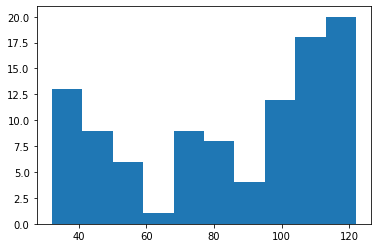

In [32]:
plt.hist(string2ascii(dif1['ciphertext'][0]))

In [40]:
# train[train['text'].str.len() <= 100]['text'][0]
# [c for c in train[train['text'].str.len() <= 100]['text'][0]]
tr_lessthanhondo = train[train['text'].str.len() <= 100]

(array([11.,  1.,  0.,  0.,  0.,  0.,  0., 11., 13., 14.]),
 array([ 32. ,  40.9,  49.8,  58.7,  67.6,  76.5,  85.4,  94.3, 103.2,
        112.1, 121. ]),
 <a list of 10 Patch objects>)

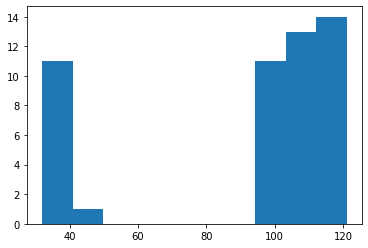

In [46]:
plt.hist(string2ascii(tr_lessthanhondo['text'][0]))

In [45]:
tr_lessthanhondo['text'].apply(string2ascii)

0         [99, 111, 109, 101, 44, 32, 119, 104, 111, 32, 121, 111, 117, 32, 97, 114, 101, 32, 97, 110, 100, 32, 119, 104, 97, 116, 32, 121, 111, 117, 32, 119, 111, 117, 108, 100, 32, 97, 114, 101, 32, 111, 117, 116, 32, 111, 102, 32, 109, 121]        
1         [70, 111, 114, 32, 97, 108, 108, 32, 105, 110, 32, 118, 97, 105, 110, 32, 99, 111, 109, 101, 115, 32, 99, 111, 117, 110, 115, 101, 108, 32, 116, 111, 32, 104, 105, 115, 32, 101, 97, 114, 46]                                                   
2         [67, 97, 112, 116, 97, 105, 110, 58, 32, 87, 105, 116, 104, 32, 116, 104, 101, 32, 110, 101, 120, 116, 32, 98, 101, 110, 101, 102, 105, 116, 32, 111, 39, 32, 116, 104, 101, 32, 119, 105, 110, 100, 46]                                         
3         [83, 109, 101, 108, 108, 115, 32, 119, 111, 111, 105, 110, 103, 108, 121, 32, 104, 101, 114, 101, 58, 32, 110, 111, 32, 106, 117, 116, 116, 121, 44, 32, 102, 114, 105, 101, 122, 101, 44]                                                